In [ ]:
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC

from pandas import read_csv 
from pandas.plotting import scatter_matrix  
from matplotlib import pyplot 
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [ ]:
techSalariesDf = pd.read_csv("/Users/alliborland/Desktop/Visual Studio/FinalProject2302/edited_salaries.csv")


selected_locations = ['Seattle, WA', 'San Francisco, CA', 'New York, NY', 'Redmond, WA', 'Mountain View, CA']

techSalariesDf = techSalariesDf[techSalariesDf['location'].isin(selected_locations)]

techSalariesDf

,title,totalyearlycompensation,yearsofexperience,location,experience_category
0,Software Engineer,100000,5.0,"San Francisco, CA",4-6
1,Software Engineer,157000,5.0,"Mountain View, CA",4-6
2,Software Engineer,208000,8.5,"Seattle, WA",7-9
3,Software Engineer,156000,4.0,"Seattle, WA",4-6
4,Software Engineer,120000,3.0,"Redmond, WA",0-3
...,...,...,...,...,...
41225,Software Engineer,170000,2.0,"Seattle, WA",0-3
41226,Software Engineer,327000,10.0,"Seattle, WA",10-19
41227,Software Engineer,237000,2.0,"Redmond, WA",0-3
41228,Software Engineer,220000,14.0,"Seattle, WA",10-19


In [ ]:
def categorize_salary(years):
    if years < 50001:
        return "0-50,000"
    elif years < 100001:
        return "50,001-100,000"
    elif years < 150001:
        return "100,001-150,000"
    elif years < 200001:
        return "150,001-200,000"
    else:
        return "200,000+"

techSalariesDf['salary_category'] = techSalariesDf['totalyearlycompensation'].apply(categorize_salary)
category_order = ['200,000+', '150,001-200,000', '100,001-150,000', '50,001-100,000', '0-50,000']
techSalariesDf['salary_category'] = pd.Categorical(techSalariesDf['salary_category'], categories=category_order, ordered=True)
techSalariesDf

,title,totalyearlycompensation,yearsofexperience,location,experience_category,salary_category
0,Software Engineer,100000,5.0,"San Francisco, CA",4-6,"50,001-100,000"
1,Software Engineer,157000,5.0,"Mountain View, CA",4-6,"150,001-200,000"
2,Software Engineer,208000,8.5,"Seattle, WA",7-9,"200,000+"
3,Software Engineer,156000,4.0,"Seattle, WA",4-6,"150,001-200,000"
4,Software Engineer,120000,3.0,"Redmond, WA",0-3,"100,001-150,000"
...,...,...,...,...,...,...
41225,Software Engineer,170000,2.0,"Seattle, WA",0-3,"150,001-200,000"
41226,Software Engineer,327000,10.0,"Seattle, WA",10-19,"200,000+"
41227,Software Engineer,237000,2.0,"Redmond, WA",0-3,"200,000+"
41228,Software Engineer,220000,14.0,"Seattle, WA",10-19,"200,000+"


In [ ]:


label_encoder_city_state = LabelEncoder()

techSalariesDf['location'] = label_encoder_city_state.fit_transform(techSalariesDf['location'])


label_encoder_salary = LabelEncoder()

techSalariesDf['salary_category'] = label_encoder_salary.fit_transform(techSalariesDf['salary_category'])

techSalariesDf.drop(columns=['title'], inplace=True)

array = techSalariesDf.values
X = array[:, :3] 
y = array[:, 3]   

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [ ]:
models = []  

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('DTC', DecisionTreeClassifier()))  
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC(gamma='auto')))  

In [ ]:
results = [] 
names = []  
for name, model in models:  
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)  
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy', error_score='raise')
    results.append(cv_results)  
    names.append(name)  
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.412057 (0.003581)
LDA: 0.933343 (0.005365)
KNN: 0.848584 (0.008738)
DTC: 0.999923 (0.000230)
NB: 0.625295 (0.010567)
SVM: 0.908261 (0.009185)


<img src="Screenshot 2024-03-31 at 6.48.37 PM.png" width="" align="" />

<img src="Screenshot 2024-04-05 at 3.25.21 PM.png" width="" align="" />

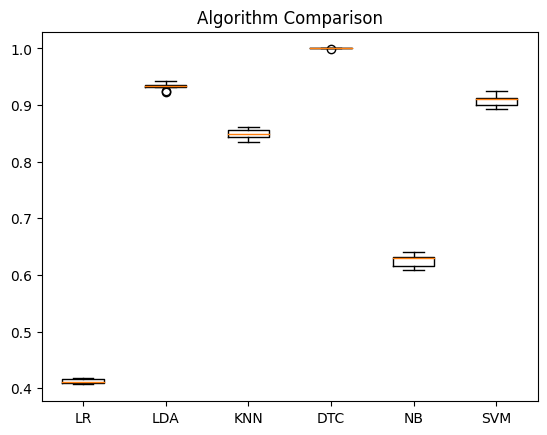

In [ ]:
pyplot.boxplot(results, labels=names) 
pyplot.title('Algorithm Comparison') 
pyplot.show()

In [ ]:
techSalariesDf

,totalyearlycompensation,yearsofexperience,location,experience_category,salary_category
0,100000,5.0,3,4-6,4
1,157000,5.0,0,4-6,2
2,208000,8.5,4,7-9,3
3,156000,4.0,4,4-6,2
4,120000,3.0,2,0-3,1
...,...,...,...,...,...
41225,170000,2.0,4,0-3,2
41226,327000,10.0,4,10-19,3
41227,237000,2.0,2,0-3,3
41228,220000,14.0,4,10-19,3


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# target column is what its going to be predicting
target_column = 'salary_category' 
feature_columns = ['yearsofexperience', 'location']

X = techSalariesDf[feature_columns]
y = techSalariesDf[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6585889570552147
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00       394
           2       0.56      0.48      0.52      1036
           3       0.69      0.92      0.79      1798
           4       0.00      0.00      0.00        28

    accuracy                           0.66      3260
   macro avg       0.25      0.28      0.26      3260
weighted avg       0.56      0.66      0.60      3260

[[   0    0    2    2    0]
 [   0    0  219  175    0]
 [   0    1  494  541    0]
 [   0    0  145 1653    0]
 [   0    0   15   13    0]]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

<img src="Screenshot 2024-04-05 at 3.23.06 PM.png" width="" align="" />

Precision: The ratio of true positive predictions to the total number of positive predictions made by the model. It measures the accuracy of positive predictions.

Recall (or Sensitivity): The ratio of true positive predictions to the total number of actual positives in the dataset. It measures the ability of the model to correctly identify positive instances.

F1-Score: The harmonic mean of precision and recall. It provides a balance between precision and recall.

Support: The number of actual occurrences of each class in the true target labels (y_test). It represents the number of instances of each class in the test set.

In [ ]:
predictions = model.predict(X)

techSalariesDf['predicted_salary_category'] = predictions

predictions_by_location = techSalariesDf.groupby('location')['predicted_salary_category'].value_counts().unstack(fill_value=0)

print(predictions_by_location)

predicted_salary_category  1     2     3
location                                
0                          0   329  1308
1                          2   631  2367
2                          1  1174   590
3                          0   707  3588
4                          5  1637  3958


In [ ]:
techSalariesDf

,totalyearlycompensation,yearsofexperience,location,experience_category,salary_category,predicted_salary_category
0,100000,5.0,3,4-6,4,3
1,157000,5.0,0,4-6,2,3
2,208000,8.5,4,7-9,3,3
3,156000,4.0,4,4-6,2,3
4,120000,3.0,2,0-3,1,2
...,...,...,...,...,...,...
41225,170000,2.0,4,0-3,2,2
41226,327000,10.0,4,10-19,3,3
41227,237000,2.0,2,0-3,3,2
41228,220000,14.0,4,10-19,3,3


In [ ]:
decoded_location = label_encoder_city_state.inverse_transform(techSalariesDf['location'])

decoded_salary = label_encoder_salary.inverse_transform(techSalariesDf['salary_category'])


techSalariesDf['location'] = decoded_location

techSalariesDf['salary_category'] = decoded_salary

techSalariesDf

,totalyearlycompensation,yearsofexperience,location,experience_category,salary_category,predicted_salary_category
0,100000,5.0,"San Francisco, CA",4-6,"50,001-100,000",3
1,157000,5.0,"Mountain View, CA",4-6,"150,001-200,000",3
2,208000,8.5,"Seattle, WA",7-9,"200,000+",3
3,156000,4.0,"Seattle, WA",4-6,"150,001-200,000",3
4,120000,3.0,"Redmond, WA",0-3,"100,001-150,000",2
...,...,...,...,...,...,...
41225,170000,2.0,"Seattle, WA",0-3,"150,001-200,000",2
41226,327000,10.0,"Seattle, WA",10-19,"200,000+",3
41227,237000,2.0,"Redmond, WA",0-3,"200,000+",2
41228,220000,14.0,"Seattle, WA",10-19,"200,000+",3


I am messing around with encoders and i had to encode them to use a classifcation model. My question is when I decode the values back, can I decode the prediction one as well? If so, do I use the same 

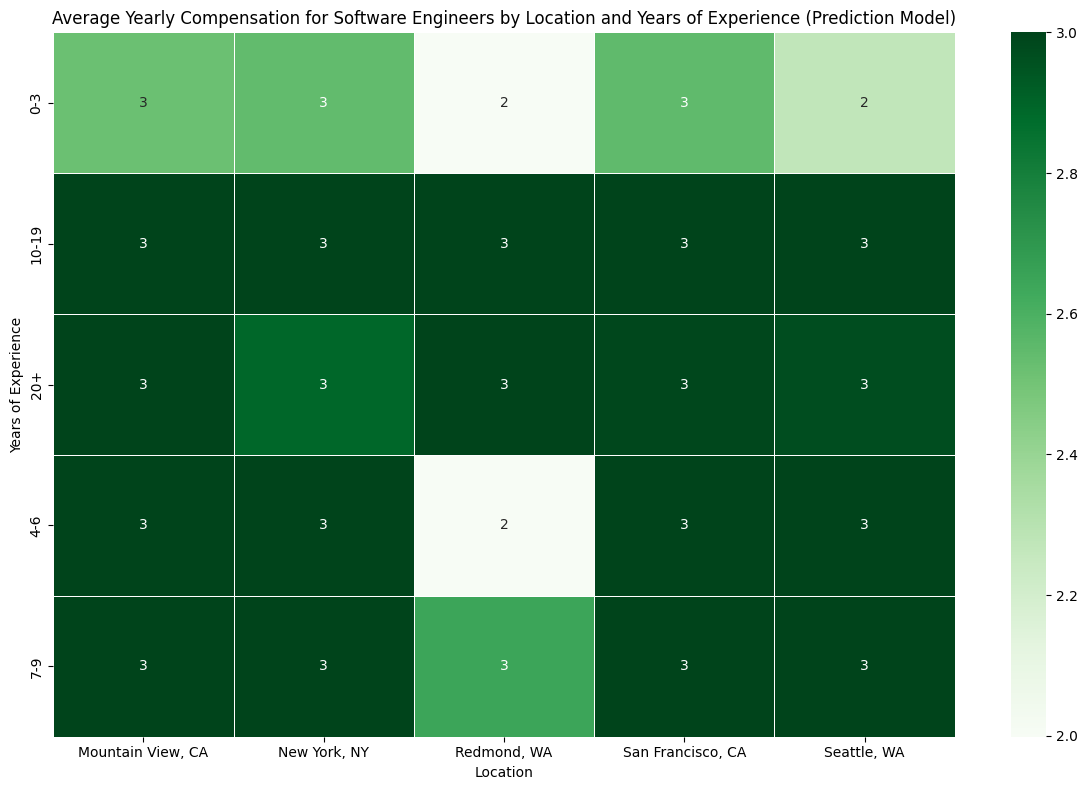

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



agg_data = techSalariesDf.groupby(['location', 'experience_category'])['predicted_salary_category'].mean().reset_index()

plt.figure(figsize=(12, 8))

pivot_table = agg_data.pivot(index='experience_category', columns='location', values='predicted_salary_category')

# cmap is color, annot is if u should show numeric data, fmt is how it is set up, and linewidth is self-explanatory
heatmap = sns.heatmap(pivot_table, cmap='Greens', annot=True, fmt=".0f", linewidths=.5)
plt.xlabel('Location')
plt.ylabel('Years of Experience')
plt.title('Average Yearly Compensation for Software Engineers by Location and Years of Experience (Prediction Model)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

think of a classification algortithm as online dating. When you are swipping you are training the classification model. Whatever is important to you is like the feature importance 

Need to use a Shap Value - it's jhow you can explain what is going on in the model and hwat is more important CAN USE THIS TO PROVE IF LOCATION OR YOE AER MORE IMPORTANT (plus we can find just HOW important they are).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b1639a5-1f60-4e70-b39d-b83cfcee6430' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>